In [2]:
import numpy as np
import os

output_folder = "generated-embeddings"
lables_file = "lables.npy"
encodings_file = "encodings.npy"

In [3]:
lables = np.load(os.path.join(output_folder, lables_file))
encodings = np.load(os.path.join(output_folder, encodings_file))

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score


In [5]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svc = LinearSVC()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
import pickle

In [36]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(encodings,
                                                        lables, 
                                                        test_size=0.33)
def train_classifier(encodings, lables, save_to="classifier.pkl"):
    
    knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
    svc = SVC(kernel='linear', probability=True)

    knn.fit(X_train, y_train)
    svc.fit(X_train, y_train)

    acc_knn = accuracy_score(y_test, knn.predict(X_test))
    acc_svc = accuracy_score(y_test, svc.predict(X_test))

    print('KNN accuracy = %f, SVM accuracy = %f'  % (acc_knn, acc_svc ))
    with open(save_to, 'wb') as clf:
        pickle.dump(knn, clf)
    return knn, svc

knn, svc = train_classifier(encodings, lables)

KNN accuracy = 0.606061, SVM accuracy = 0.575758


In [17]:
print(knn.predict_proba([X_test[0]]), y_test[0], lables[0])
svc.predict_proba([X_test[1]])

[[0. 1.]] 0 0


array([[0.4086334, 0.5913666]])

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline 
plt.rcParams["figure.figsize"] = (15, 9)
import cv2, os, face_recognition, time
cv2.__version__

'4.1.0'

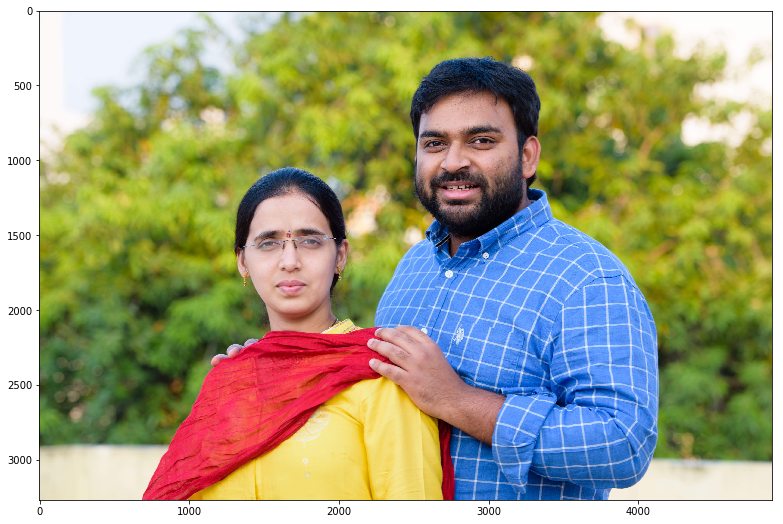

In [25]:
from util_scripts.grab_faces import Image, Face
imagePath = 'data/photos/Sahasra-151.jpg'
def shimg(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
image = Image(imagePath)
shimg(image.image)

In [26]:
image.detectFaces()

In [28]:
import time
image.saveFaces()

In [20]:
!ls data/faces

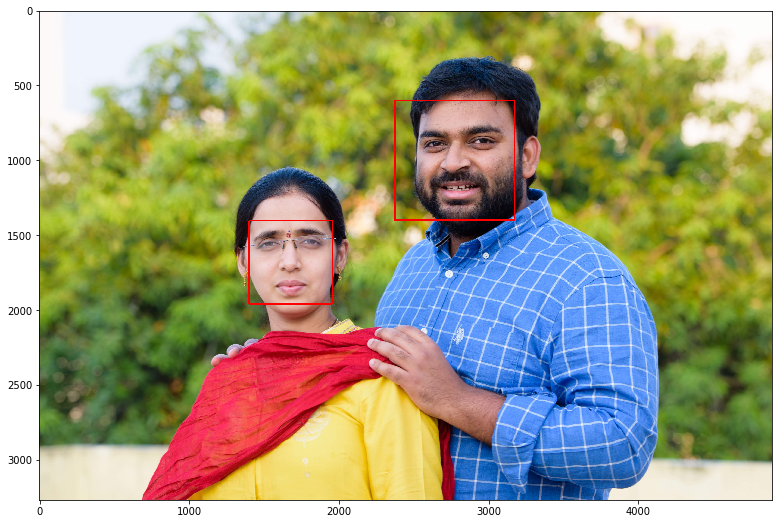

In [29]:
image.drawBoundingBoxes()
shimg(image.image)